In [21]:
{-# LANGUAGE NoMonomorphismRestriction #-}
{-# LANGUAGE FlexibleContexts          #-}
{-# LANGUAGE TypeFamilies              #-}
import Data.Active
import Diagrams.Prelude
import Diagrams.Backend.Cairo
import IHaskell.Display
import Diagrams.Animation
import Linear.Vector
import Data.Tuple
import System.Random

let nPts = 100
let wdth = 100.0
let height = 100.0
let pt = circle 1 # fc black
let baseSpeed = 0.3
rad = 100

-- replicateM n $ randomRIO (0,1::Float)
-- randomIO :: IO Float

In [24]:
stdn num = map (/num) [0..num]
let std = stdn nPts

lerpScaler x a b c d = fst $ unr2 $ lerp ((x - a)/(b - a)) (r2 (d,0)) (r2 (c,0))
-- lerpPts x pts1 pts2 = map unr2 $ zipWith (lerp x) (map r2 pts1) (map r2 pts2) 
lerpPts x pts1 pts2 = map unr2 $ zipWith (lerp x) (map r2 pts2) (map r2 pts1)

rotate' ang (x,y) = ((cos ang)*x - (sin ang)*y, (sin ang)*x + (cos ang)*y)
rotatePts ang points = map (rotate' ang) points

foo small' big' = ((lerpScaler (abs small') (-c') c' (-sideL) sideL)*signum small', sideL*signum big')
                where   c' = 100*(cos (pi/4.0))
                        sideL = 100
squarify (x,y) =  if abs x < abs y then foo x y else swap $ foo y x

squiggly num amp x = (rad'*cos(2*pi*x), rad'*sin(2*pi*x))
    where   rad' = rad + amp*(cos(num*ang)) -- radius dependent on angle
            ang = 2*pi*x

randScalars n g = take n $ randomRs (0,1) g :: [Double]
randPts n g =  zip (take n $ randScalars (2*n::Int) g) (drop n $ randScalars (2*n::Int) g) 

fuzzify xamp yamp rands points = zipWith (\(x,y) (rx,ry) -> (x + xamp*rx, y + yamp*ry)) points rands 
fuzzifyG xamp yamp g points = fuzzify xamp yamp (randPts (length points) g) points 

draw points = atPoints (map p2 points) $ repeat pt
mkScene speed (shotx, shoty) = (pure (\t -> (draw (lerpPts (t) shotx shoty))) <*>
                            stretch (baseSpeed*speed) ui) :: Animation B V2 Double
getShots xs = map fst xs
getSpeeds xs = map snd xs
play xs = movie $ zipWith ($)
                        (map mkScene $ getSpeeds $ init xs)
                        $ zip (getShots $ init xs) (getShots $ tail xs)

In [5]:
rnd <- randomIO :: IO Int
shot1 = map (\(x,y)->(-wdth + 2*wdth*x, -height + 2*height*y)) $ randPts nPts (mkStdGen rnd)
shot2 = zip (map (\x-> -wdth + 2*wdth*x) std) (repeat 0.0)
shot3 = map (\x -> (rad*cos(2*pi*x), rad*sin(2*pi*x))) std
shot4 = rotatePts (pi / 4) $ map squarify shot3
shot5 = lerpPts 0.5 shot3 shot4

In [6]:
rnd <- randomIO :: IO Int
shot1 = map (\(x,y)->(-wdth + 2*wdth*x, -height + 2*height*y)) $ randPts nPts (mkStdGen rnd) -- rand
shot2 = zip (map (\x-> -wdth + 2*wdth*x) std) (repeat 0.0) -- horiz line
shot3 = map (\x -> (rad*cos(2*pi*x), rad*sin(2*pi*x))) std -- circle
shot4 = rotatePts (pi / 4) shot3 -- rotate
-- shot45 = lerpPts 0.5 shot4 $ map squarify shot4
shot5 = lerpPts 0.35 shot4 $ rotatePts (pi / 4) $ map squarify shot3 -- squircle
shot6 = rotatePts (-pi / 4) $ lerpPts 1.5 shot3 $ map squarify shot3 -- diamond

In [ ]:
-- play [(shot1,2), (shot2,4), (shot2,2), (shot3,1), (shot4,1), (shot5,1), (shot1,1)]
play [(shot3,2), (shot4,2), (shot5,2), (shot5,2), (shot6,2)]

In [ ]:
diagram $ draw shot3
diagram $ draw shot4
diagram $ draw $ lerpPts 0.35 shot4 shot45
diagram $ draw shot5

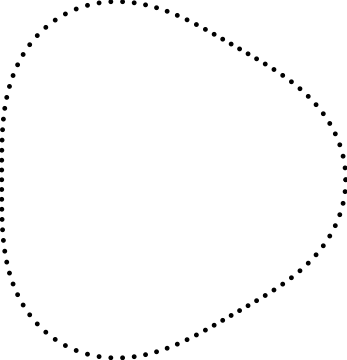

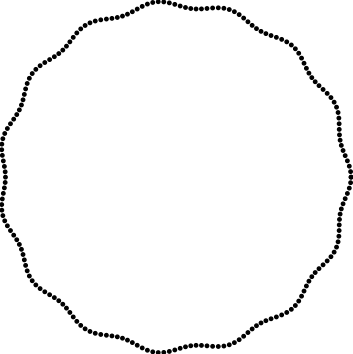

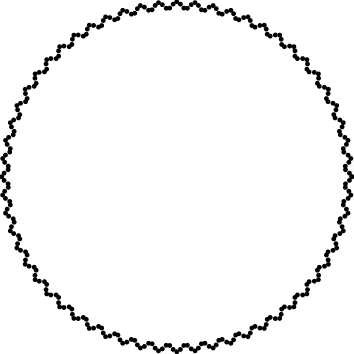

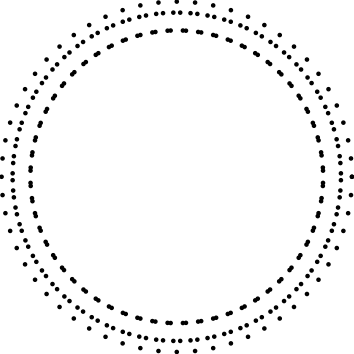

In [27]:
diagram $ draw $ map (squiggly 3 10) (stdn 100)
diagram $ draw $ map (squiggly 15 2) (stdn 200)
diagram $ draw $ map (squiggly 60 2) (stdn 300)
diagram $ draw $ map (squiggly 60 10) (stdn 300)